In [150]:
import matplotlib.pyplot as plt
import numpy as np

from lacbox.io import load_cmb

import scienceplots
# matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])



# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'normal'

# Load HAWCStab2

In [151]:
TURBINE_NAME = 'Breeze Boss'
CMB_PATH = './structural_Campbell_BB.cmb'
MODE_NAMES = ['Tower for-aft', 'Tower side-side', '1st flapwise BW', '1st flapwise FW', '1st flapwise sym',
              '1st edgewise BW', '1st edgewise FW', '2nd flapwise BW', '2nd flapwise FW', '1st flapwise sym', '1st edgewise sym']
DT_MODENUM = 12  # what mode number in HAWCStab2 is the drivetrain mode?

# load campbell diagram
omega, dfreqs, _ = load_cmb(CMB_PATH, cmb_type='structural')
omega_rpm = omega * 30 / np.pi  # from rad/s to RPM

# swap modes 5 and 6 after 3 RPM. hawcstab2 mixed them up at the crossing.
SWAP_RPM = 3
dfreq_mode5 = dfreqs[omega_rpm > SWAP_RPM, 3]
dfreqs[omega_rpm > SWAP_RPM, 3] = dfreqs[omega_rpm > SWAP_RPM, 4]
dfreqs[omega_rpm > SWAP_RPM, 4] = dfreq_mode5

# Load Simple Method

In [152]:
Blade_1_st_flap = 0.63 * 60  #RPM
Blade_1_st_edge = 0.96 * 60 #RPM
Tower = 0.25 * 60 #RPM

rpm_rotor = np.arange(0,8.5,0.5)

"""BW modes decrease with 𝜴
FW modes increase with 𝜴"""

BW_1_st_flap = Blade_1_st_flap - rpm_rotor
FW_1_st_flap = Blade_1_st_flap + rpm_rotor
SYM_1st_flap = np.ones(len(rpm_rotor))*Blade_1_st_flap

BW_1_st_edge = Blade_1_st_edge - rpm_rotor
FW_1_st_edge = Blade_1_st_edge + rpm_rotor
SYM_1st_edge = np.ones(len(rpm_rotor))*Blade_1_st_edge

# Plots

In [153]:
# Assign colors to mode categories
tower_color = 'tab:blue'       # Color for tower modes
flapwise_1st_color = 'tab:orange'   # Color for 1st flapwise modes
flapwise_2nd_color = 'tab:red'  # Color for 2nd flapwise modes
edgewise_color = 'tab:green'     # Color for edgewise modes

# Define markers based on specific rules
tower_markers = ['x', 'x']  # Tower modes use 'x' for both
flapwise_markers = ['<', '>', 'o', '<', '>', 'o']  # < for backwards, > for fore-aft, 'o' for symmetric
edgewise_markers = ['<', '>', 'o']  # Edgewise modes markers

# Categorize modes based on their type (tower, flapwise, edgewise)
tower_modes = [0, 1]  # Indexes for tower modes
flapwise_1st_modes = [2, 3, 4]  # Indexes for 1st flapwise modes
flapwise_2nd_modes = [7, 8, 9]  # Indexes for 2nd flapwise modes
edgewise_modes = [5, 6, 10]  # Indexes for edgewise modes

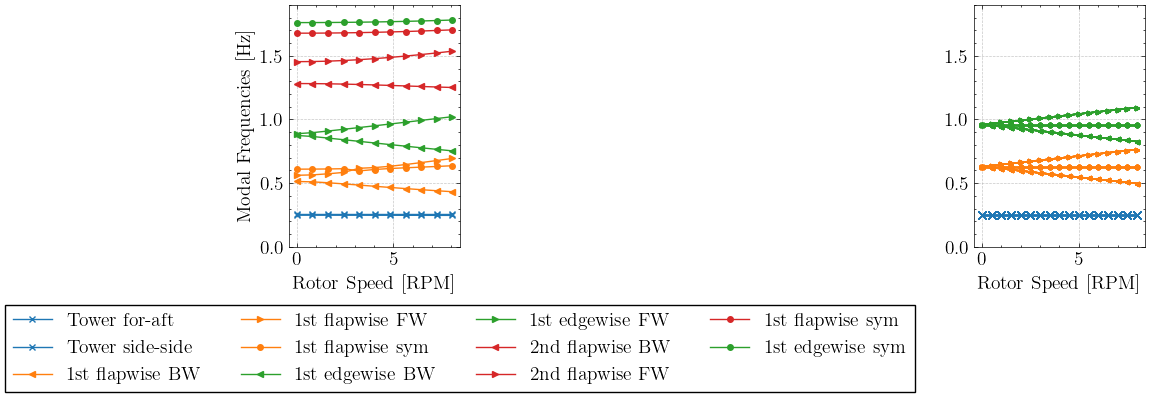

In [154]:
# initialize plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))
# plt.subplots_adjust(wspace=0.3, left=0.1)

# loop through modes
NMODES = len(MODE_NAMES)
for i in range(NMODES):
    # Assign color and marker based on mode type
    if i in tower_modes:
        color = tower_color
        marker = tower_markers[tower_modes.index(i)]  # Get the marker for tower modes
    elif i in flapwise_1st_modes:
        color = flapwise_1st_color
        marker = flapwise_markers[flapwise_1st_modes.index(i)]  # Get the marker for 1st flapwise modes
    elif i in flapwise_2nd_modes:
        color = flapwise_2nd_color
        marker = flapwise_markers[flapwise_2nd_modes.index(i)]  # Get the marker for 2nd flapwise modes
    elif i in edgewise_modes:
        color = edgewise_color
        marker = edgewise_markers[edgewise_modes.index(i)]  # Get the marker for edgewise modes


    # If we're at the end of the loop, take the index of the drivetrain mode number instead
    arr_idx = i if i < NMODES - 1 else DT_MODENUM - 2  # off by 2 from hawcstab2 because python + skip rigid-body


    # left plot: Simple Method
    axs[0].plot(omega_rpm, dfreqs[:, arr_idx], marker=marker, markersize=4, color=color, label=MODE_NAMES[i])

    # Plot flapwise modes
    axs[1].plot( rpm_rotor, BW_1_st_flap/60, marker='<', markersize=3, color='tab:orange')
    axs[1].plot( rpm_rotor, FW_1_st_flap/60, marker='>', markersize=3, color='tab:orange')
    axs[1].plot( rpm_rotor, SYM_1st_flap/60, marker='o', markersize=3, color='tab:orange')

    # Plot edgewise modes
    axs[1].plot(rpm_rotor, BW_1_st_edge/60,  marker='<', markersize=3, color='tab:green')
    axs[1].plot(rpm_rotor, FW_1_st_edge/60,  marker='>', markersize=3, color='tab:green')
    axs[1].plot(rpm_rotor, SYM_1st_edge/60,  marker='o', markersize=3, color='tab:green')
    
    axs[1].plot(rpm_rotor, Tower*np.ones(len(rpm_rotor))/60, color='tab:blue', marker = 'x')



# load opt file, add P-harmonics?


# prettify
axs[0].set(xlabel='Rotor Speed [RPM]', ylabel='Modal Frequencies [Hz]')
axs[0].grid(linewidth=0.5, linestyle='--', alpha=0.7)
axs[0].legend(loc='upper center', bbox_to_anchor=(1., -0.2), ncol=4) 
axs[0].set_ylim(0, 1.9)

axs[1].set(xlabel='Rotor Speed [RPM]')
axs[1].grid(linewidth=0.5, linestyle='--', alpha=0.7)
axs[1].set_ylim(0, 1.9)


plt.savefig('structural_comparison.pdf', dpi=300)

# add figure title and scale nicely
# fig.suptitle(f'Aeroelastic Campbell diagram for {TURBINE_NAME}')
fig.tight_layout()
